<a href="https://colab.research.google.com/github/easthometown/assignment/blob/main/USExportsOfCrudeOil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project - U.S. Exports Of Crude Oil
Hello, did you know that the United States is the world’s leading oil producer? I discovered this fact from the following source: Wikipedia. Below, you will find a table that I have created based on this data. In this project, I will delve deeper into this subject. Thank you in advance for your cooperation.

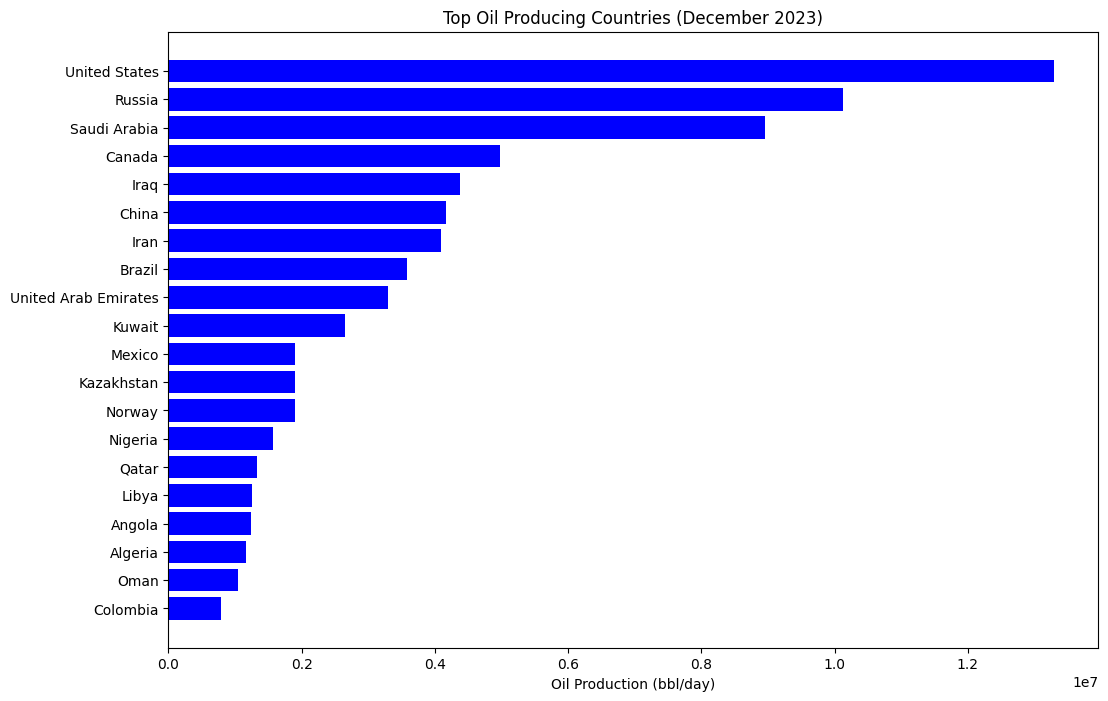

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    'Country': ['United States', 'Russia', 'Saudi Arabia', 'Canada', 'Iraq', 'China', 'Iran',
                'Brazil', 'United Arab Emirates', 'Kuwait', 'Mexico', 'Kazakhstan', 'Norway',
                'Nigeria', 'Qatar', 'Libya', 'Angola', 'Algeria', 'Oman', 'Colombia'],
    'Oil Production (bbl/day)': [13295000, 10126000, 8950000, 4971000, 4375000, 4172000, 4084000,
                                  3585000, 3300000, 2644000, 1903000, 1897000, 1894000, 1573000,
                                  1322000, 1248000, 1235000, 1160000, 1040000, 787000]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Sort the DataFrame by 'Oil Production (bbl/day)' in descending order
df = df.sort_values(by='Oil Production (bbl/day)', ascending=False)

# Create a figure and a bar plot
plt.figure(figsize=(12, 8))
plt.barh(df['Country'], df['Oil Production (bbl/day)'], color='blue')

# Set the x-label and the title of the plot
plt.xlabel('Oil Production (bbl/day)')
plt.title('Top Oil Producing Countries (December 2023)')

# Invert the y-axis
plt.gca().invert_yaxis()

# Display the plot
plt.show()


## Rising U.S. Oil Exports: A Time-Series Analysis
I have downloaded data from the **U.S. Energy Information Administration (EIA)** and utilized it to create a time-series graph. As evident from the graph, U.S. oil exports have been on a significant rise since around 2005. The next intriguing question that arises is - which countries are the recipients of these U.S. exports? That's the question I'll be investigating next.

In [5]:
# Read the data from the Excel file provided by the U.S. Energy Information Administration (EIA)
df = pd.read_excel("PET_MOVE_EXPC_A_EP00_EEX_MBBL_M.xls", sheet_name="Data 1", skiprows=2)

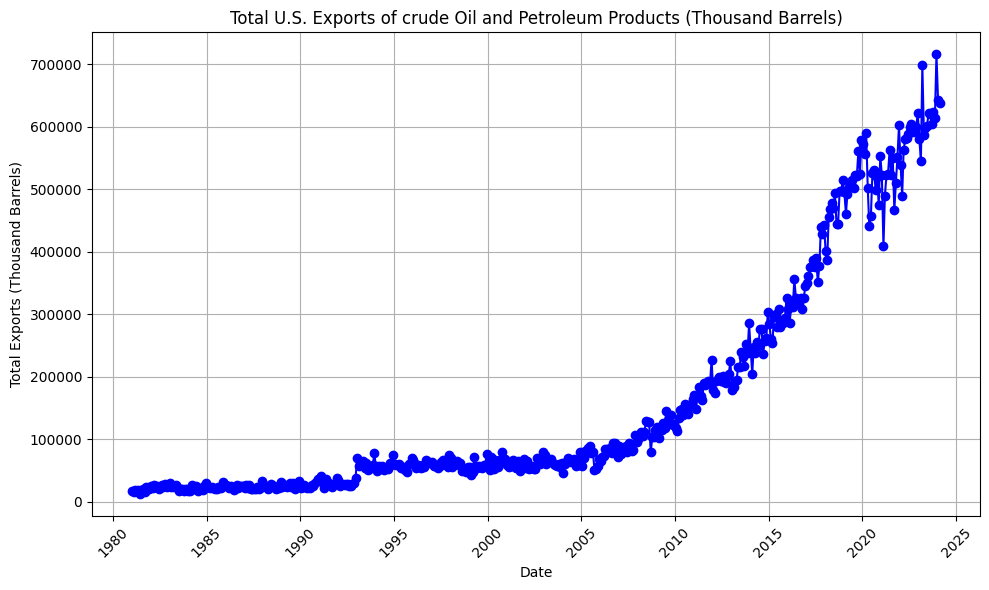

In [6]:
df['Total Exports'] = df.iloc[:, 1:].sum(axis=1)
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Total Exports'], color='Blue', marker='o', linestyle='-')
plt.title('Total U.S. Exports of crude Oil and Petroleum Products (Thousand Barrels)')
plt.xlabel('Date')
plt.ylabel('Total Exports (Thousand Barrels)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## U.S. Oil Exports: Top 15 Destination Countries
This plot visualizes the top 15 countries to which the U.S. exports oil and petroleum products. The data was sourced from the U.S. Energy Information Administration (EIA). The blue bars represent the total exports in thousand barrels. As we can see from the plot, Mexico is the largest recipient of U.S. oil exports, followed by Canada and the Netherlands.

In [7]:
df.drop(['U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels)'],axis=1, inplace=True)
columns_to_keep = ['Date'] + [column for column in df.columns if 'U.S. Exports to' in column]
df = df[columns_to_keep]

In [8]:
country_names = [column.split(' to ')[1] if 'U.S. Exports to' in column else 'Date' for column in df.columns]
names = [column.split(' of ')[0] if 'of' in column else 'Date' for column in country_names]
df.columns = names

In [9]:
melted_df = df.melt(id_vars=['Date'], var_name='Country', value_name='Exports')

In [10]:
df = melted_df.dropna()

In [11]:
country_totals = df.groupby('Country')['Exports'].sum().sort_values(ascending=False)
#country_totals

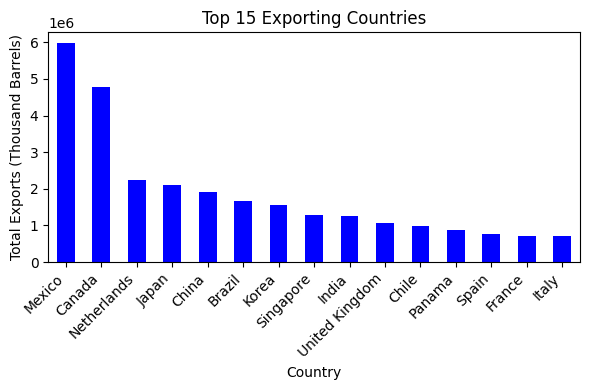

In [12]:
plt.figure(figsize=(6, 4))
country_totals.head(15).plot(kind='bar', color='blue')
plt.title('Top 15 Exporting Countries')
plt.xlabel('Country')
plt.ylabel('Total Exports (Thousand Barrels)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## U.S. Oil Exports Over Time: A Country-by-Country Analyses
This series of plots visualizes the exports of oil and petroleum products from the U.S. to each of the top 15 recipient countries over time. Each plot shows the exports to a specific country, with the data points represented by blue circles connected by blue lines. This visualization provides valuable insights into the trends and patterns of U.S. oil exports to these countries.

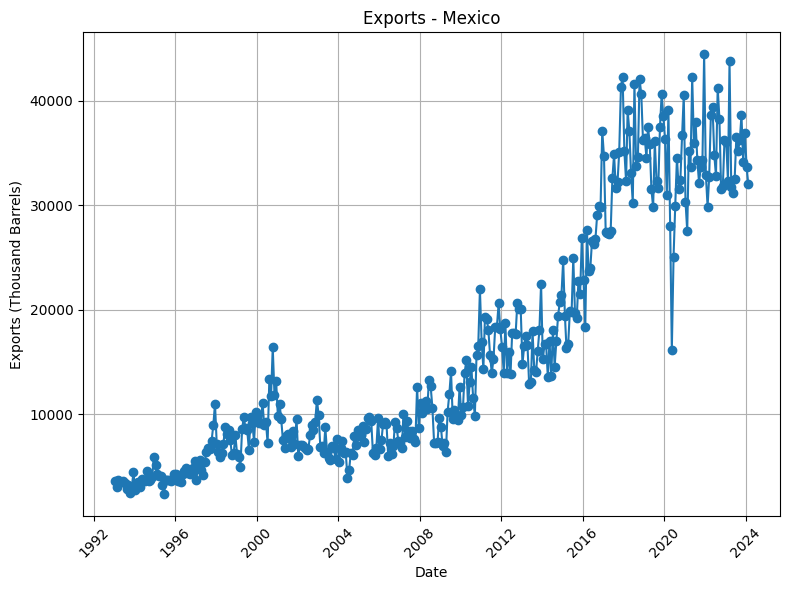

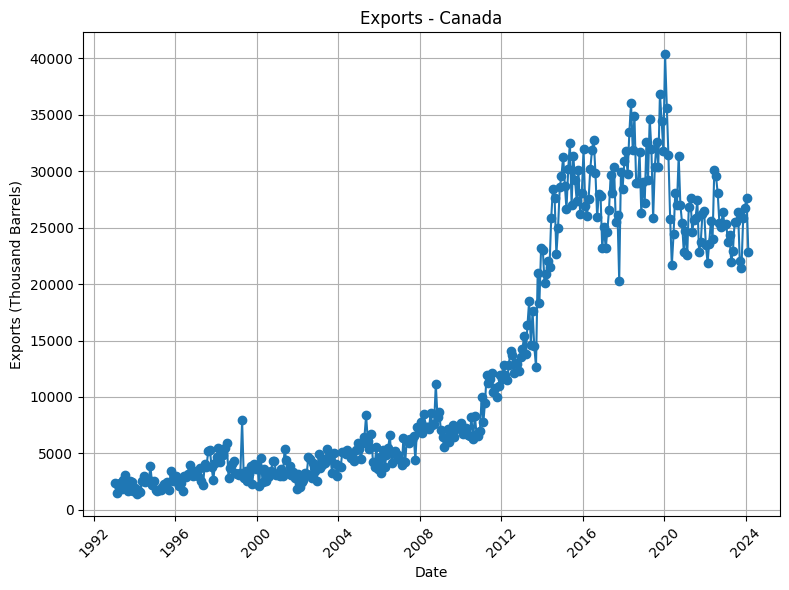

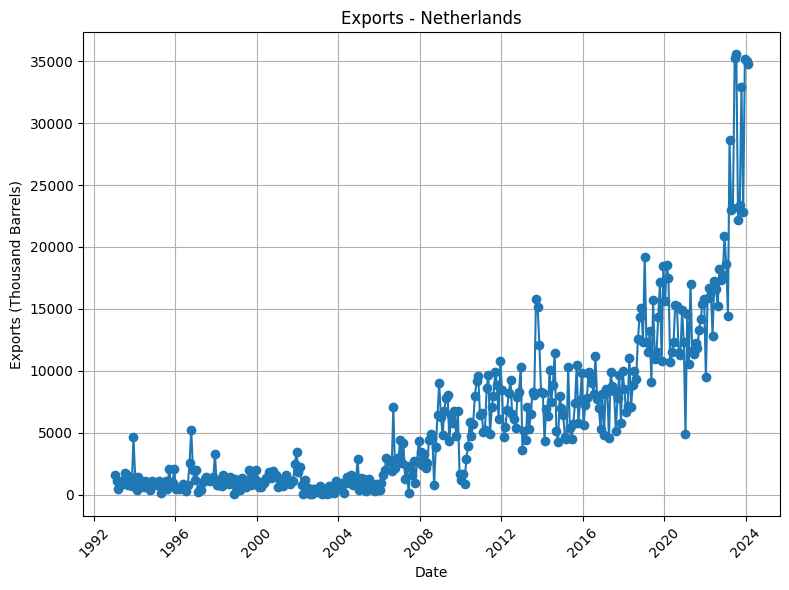

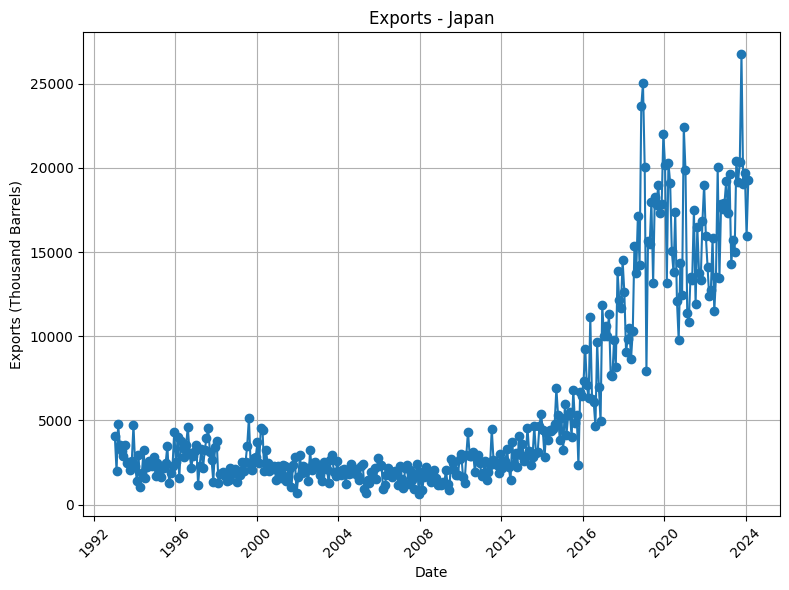

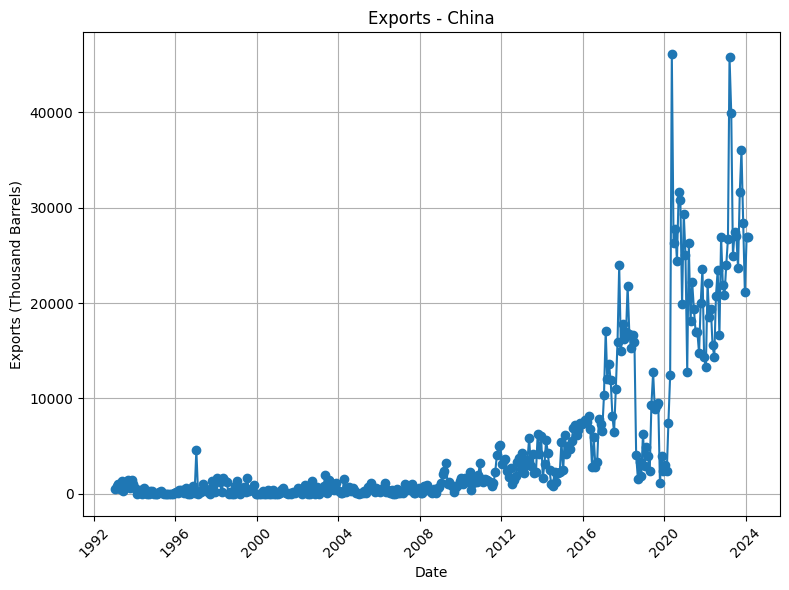

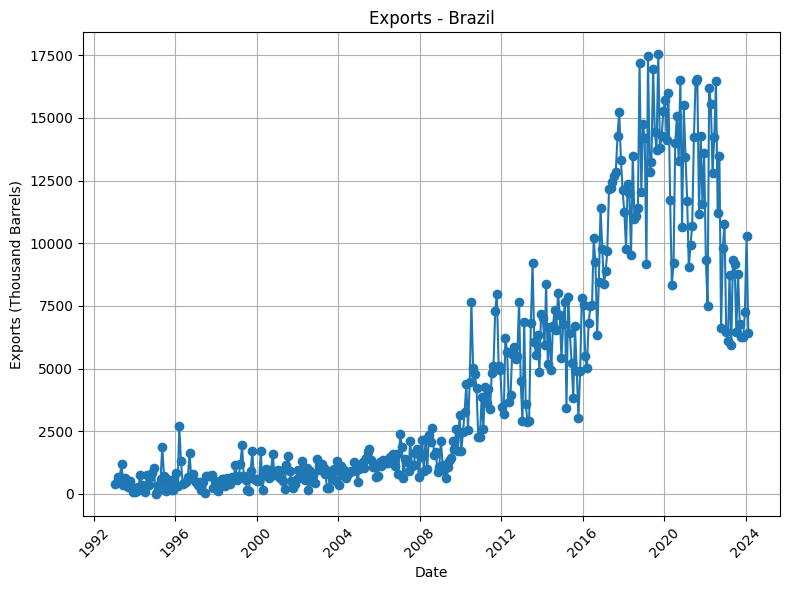

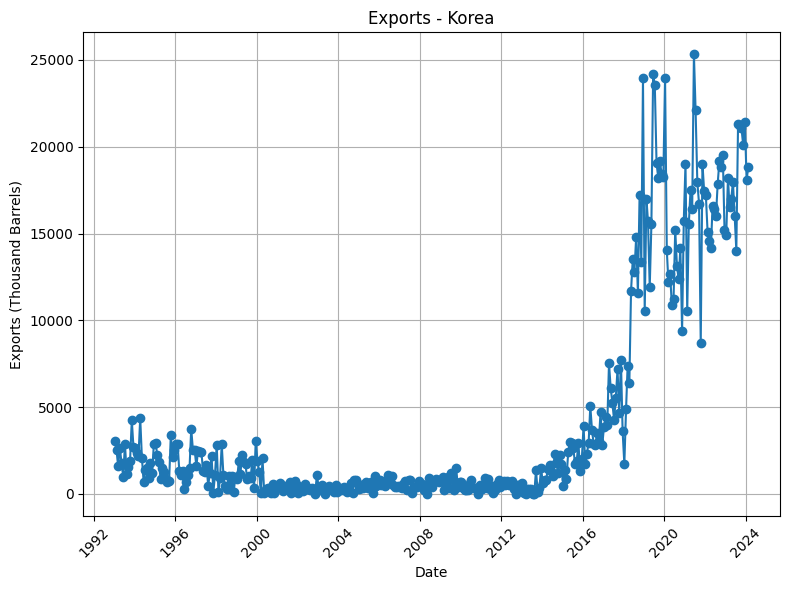

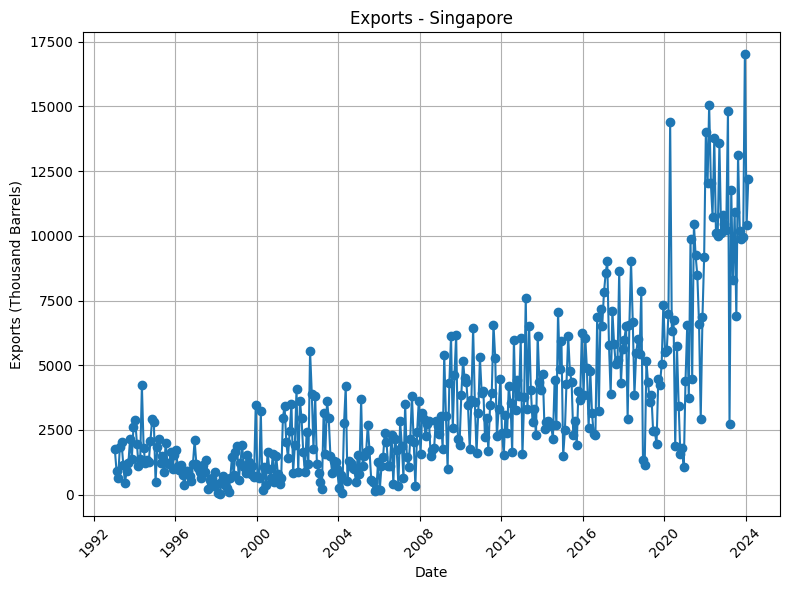

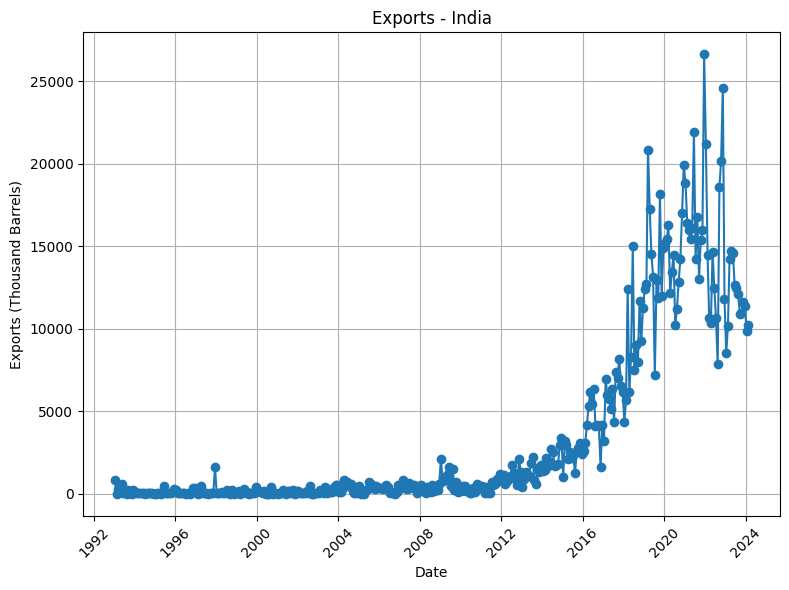

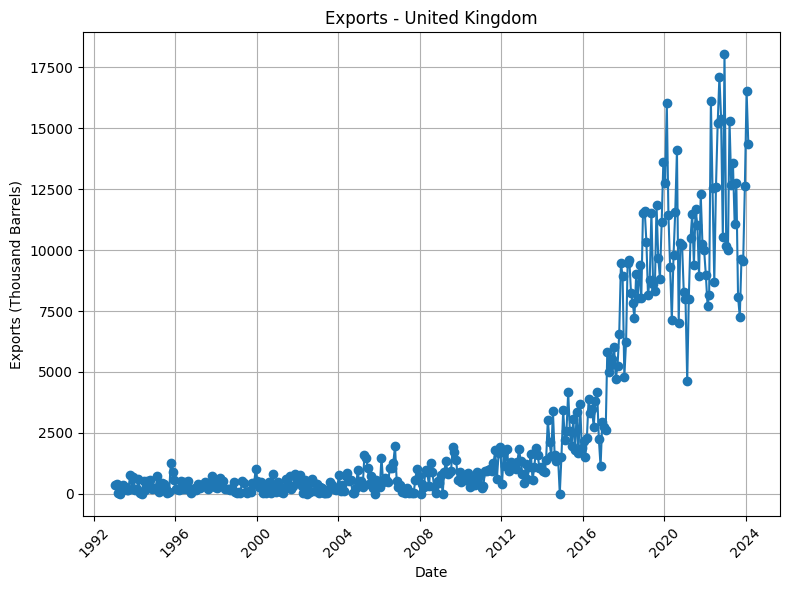

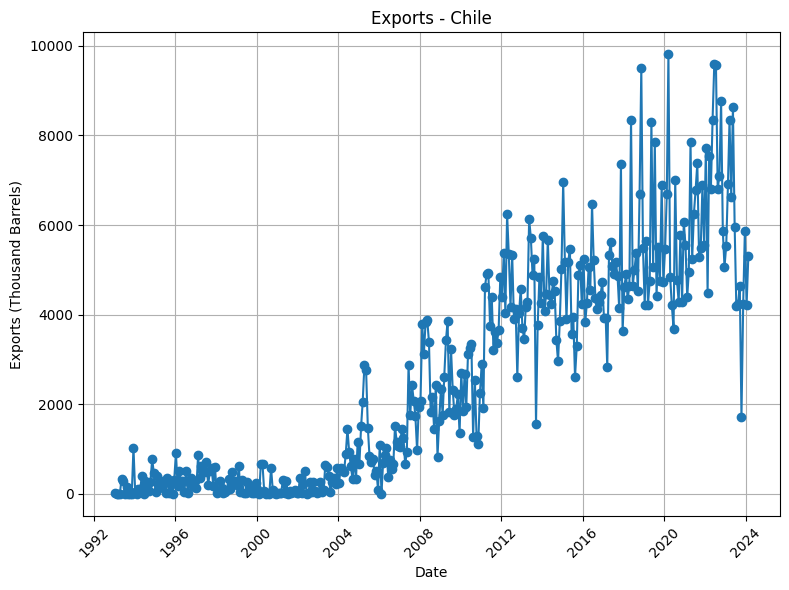

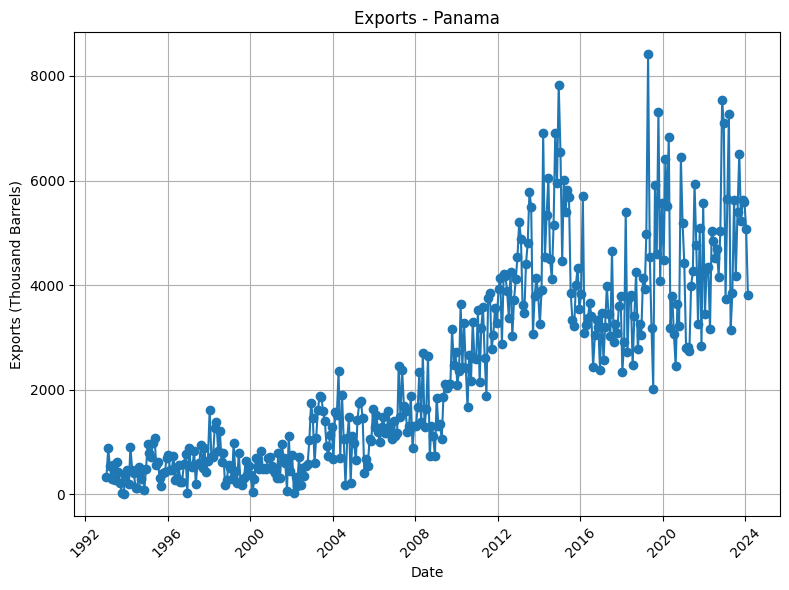

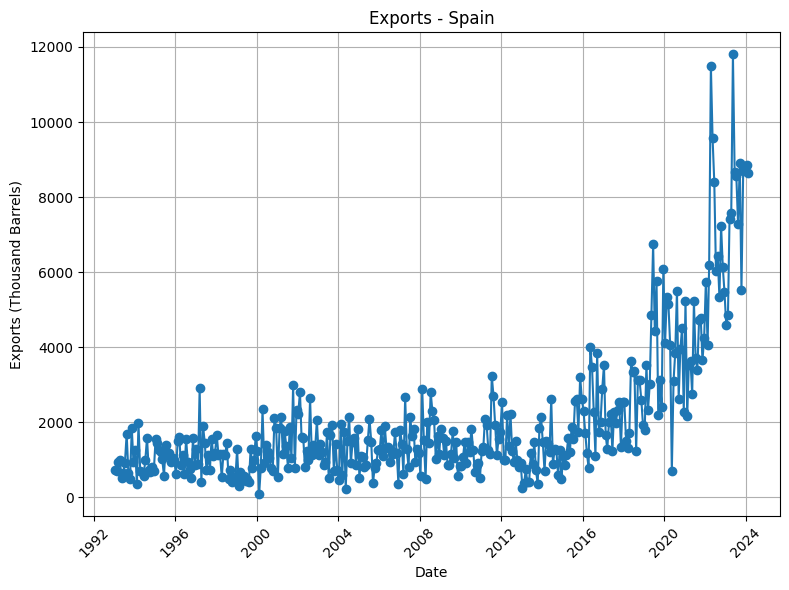

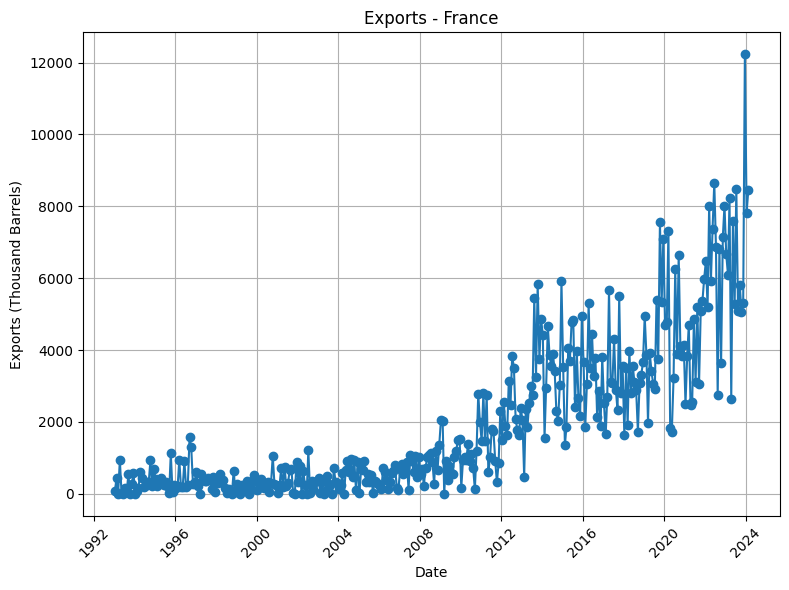

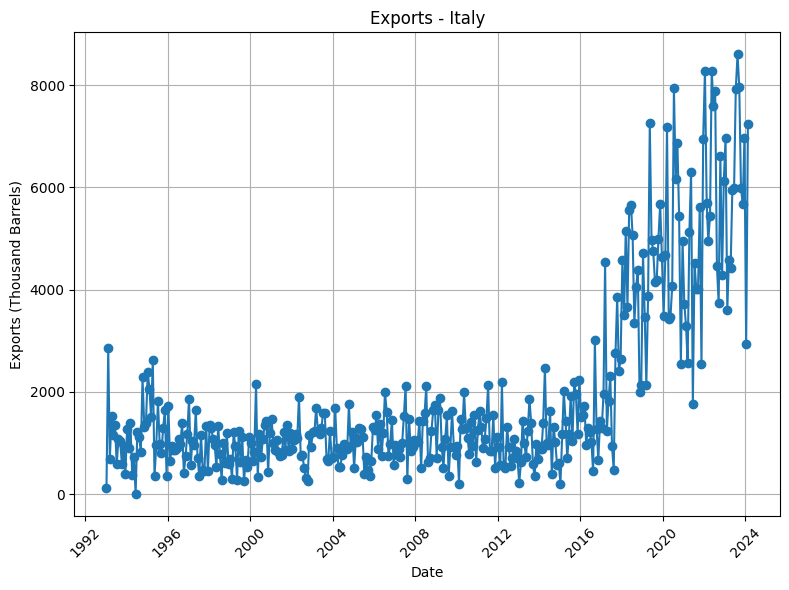

In [13]:
for country in country_totals.head(15).index:
    country_data = df[df['Country'] == country]
    plt.figure(figsize=(8, 6))
    plt.plot(country_data['Date'], country_data['Exports'], marker='o', linestyle='-')
    plt.title(f'Exports - {country}')
    plt.xlabel('Date')
    plt.ylabel('Exports (Thousand Barrels)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Unsupervised Machine Learning: Clustering Analysis of U.S. Oil Exports
In this part of the project, I applied unsupervised machine learning techniques to analyze U.S. oil exports. Specifically, I used the KMeans clustering algorithm to group countries based on their total exports of oil and petroleum products to the U.S. and thier geographical distance from the U.S. The resulting clusters provide valuable insights into the relationships between geographical distance, export volumes, and their clustering patterns.

In [14]:
from geopy.geocoders import Nominatim

def get_lat_lng(country):
    geolocator = Nominatim(user_agent="poo.taro1", timeout=10)
    location = geolocator.geocode(country)
    if location is None:
        #print(f"Could not find location for {country}")
        return (None, None)
    else:
        return (location.latitude, location.longitude)


In [15]:
from geopy.distance import geodesic

country_totals_df = country_totals.reset_index()

us_lat, us_lng = get_lat_lng("United States")

country_totals_df['Distance_to_US'] = country_totals_df['Country'].apply(lambda x: geodesic(get_lat_lng(x), (us_lat, us_lng)).miles)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


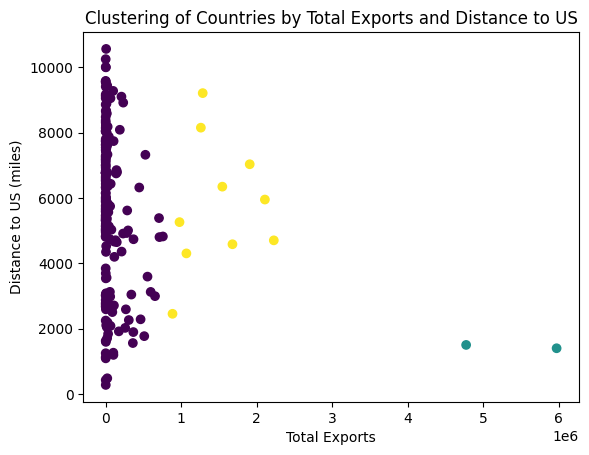

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Preparing data
exports_data = country_totals_df[['Exports']]

scaler = StandardScaler()
scaled_exports_data = scaler.fit_transform(exports_data)

# Applying KMeans clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(scaled_exports_data)
country_totals_df['Cluster'] = kmeans.labels_

# Use 'Distance_to_US' as the y-coordinate for visualization
plt.scatter(country_totals_df['Exports'], country_totals_df['Distance_to_US'], c=country_totals_df['Cluster'], cmap='viridis')
plt.xlabel('Total Exports')
plt.ylabel('Distance to US (miles)')
plt.title('Clustering of Countries by Total Exports and Distance to US')

plt.show()


## Geographical Distribution of U.S. Oil Exports: A Visual Perspective
In this part of the project, I created a world map to visualize the geographical distribution of U.S. oil exports. Each country that the U.S. exports to is represented by a circle marker on the map. The size of each marker is proportional to the country's total exports of oil and petroleum products to the U.S. oil exports, highlighting the global reach of U.S. oil and petroleum products.

In [17]:
import folium
world_map = folium.Map(location=[0, 0], zoom_start=2)
for idx, row in country_totals_df.iterrows():

    lat, lng = get_lat_lng(row['Country'])

    if lat is None or lng is None:
        continue

    normalized_export = row['Exports'] / country_totals_df['Exports'].max()

    folium.CircleMarker(
        location=[lat, lng],
        radius=normalized_export * 30,
        color="blue",
        fill=True,
        fill_color="blue",
    ).add_to(world_map)


In [18]:
world_map

## Conclusion
In this project, I explored the fascinating world of U.S. oil exports. I began by examining the overall trend of U.S. oil production and found that the United States is the world's leading oil producer. Then delve deeper into the data, identifying the top 15 countries receiving U.S. oil exports.

My analysis revealed that Mexico is the largest recipient, followed by Canada and the Netherlands. I also discovered that U.S. oil exports have been on a significant rise since around 2005.

To further my understanding, I applied unsupervised machine learning techniques, specifically KMeans clustering, to group countries based on their total exports and their geographical distance from the U.S. This provided valuable insights into the relationships between geographical distance, export volumes, and their clustering patterns.

Finally, I visualized the geographical distribution of U.S. oil exports on a world map. This highlighted the global reach of U.S. oil and petroleum products, emphasizing the significant role the U.S. plays in the global oil market.

This project not only enhanced my understanding of U.S. oil exports but also demonstrated the power of data analysis and machine learning in uncovering patterns and insights from complex datasets. As I move forward, I can apply these techniques to other domains, continuing to uncover hidden patterns and generate valuable insights.